In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [2]:
global mu10,mu20,mu1,mu2,gamma,D,eta,kappa

In [3]:
def TwoSpecies(t,y):
    s1=y[0]
    s2=y[1]
    p1=y[2]
    p2=y[3]
    lambda1=mu1/mu10-1
    lambda2=mu2/mu20-1

    dydt=[mu1/s1*(s1+lambda2*p1)*s1*(1-s1-gamma*s2)-D*s1,
        mu2/s2*(s2+lambda1*p2)*s2*(1-gamma*s1-s2)-D*s2,
        mu1*(1+lambda2)*p1*(1-s1-gamma*s2)+eta*(s2+p1)*(s1-p1)-kappa*p1-D*p1,
        mu2*(1+lambda1)*p2*(1-gamma*s1-s2)+eta*(s1+p2)*(s2-p2)-kappa*p2-D*p2]
    return dydt

In [4]:
D=0.2
mms=[6,8,10,12]
gamma=0.9
kappa=0.005
num=500
mu10=0.5
mu20=0.5
mu1s=np.random.rand(num)
mu2s=np.random.rand(num)

initial=[0.5,0.5,0,0]
timespan=np.arange(0,301,1)

en=6
etas=np.zeros((len(mms),en))
for i in range(len(mms)):
    mm=mms[i]
    etas[i,:]=10**(np.arange(-4,4/(en-1),4/(en-1))-mm)
S1=np.zeros((len(mms),np.size(etas,1),num))
S2=np.zeros((len(mms),np.size(etas,1),num))

In [5]:
for i in range(len(mms)):
    print(i)
    mm=mms[i]
    for j in range(np.size(etas,1)):
        eta=etas[i,j]*(10**mm)
        for k in range(num):
            mu1=mu1s[k]
            mu2=mu2s[k]
            sol=solve_ivp(TwoSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            S1[i,j,k]=y[-1,0]
            S2[i,j,k]=y[-1,1]


0
1
2
3


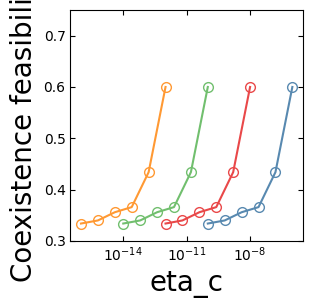

In [10]:
thresh=0.01
prob=np.zeros((len(mms),np.size(etas,1)))
for i in range(len(mms)):
    for j in range(np.size(etas,1)):
        pin=0
        for k in range(num):
            if min(S1[i,j,k],S2[i,j,k])>thresh:
                pin=pin+1
        prob[i,j]=pin/num;

plt.figure(figsize=(3,3))
for i in range(len(mms)):
    if i==0:
        plt.plot(etas[i,:],prob[i,:],'o-',markersize=7,fillstyle='none',color=(0.346666666666667,0.536000000000000,0.690666666666667))
    if i==1:
        plt.plot(etas[i,:],prob[i,:],'o-',markersize=7,fillstyle='none',color=(0.915294117647059,0.281568627450980,0.287843137254902))
    if i==2:
        plt.plot(etas[i,:],prob[i,:],'o-',markersize=7,fillstyle='none',color=(0.441568627450980,0.749019607843137,0.432156862745098))
    if i==3:
        plt.plot(etas[i,:],prob[i,:],'o-',markersize=7,fillstyle='none',color=(1,0.598431372549020,0.200000000000000))
plt.xscale('log')
plt.box('off')
plt.xlabel('eta_c',fontsize=20)
plt.ylabel('Coexistence feasibility',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.ylim(0.3,0.75)
plt.savefig('ChangeEtac.pdf')
plt.show()

In [7]:
import pandas as pd
df1=pd.DataFrame(etas)
df2=pd.DataFrame(prob)
df1.to_csv("Eta.csv")
df2.to_csv("Prob.csv")